In [44]:
from sklearn.datasets import load_iris, load_wine
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
irisDF = pd.DataFrame( iris['data'], columns=iris['feature_names'])
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
color=[]
for n in iris.target:
    if n==0:
        color.append('r')
    elif n==1:
        color.append('g')
    else:
        color.append('b')

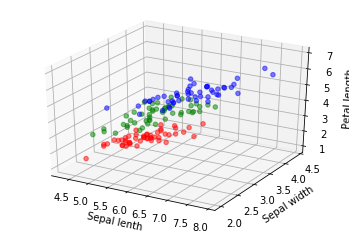

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d' )
ax.scatter(irisDF['sepal length (cm)'],irisDF['sepal width (cm)'],
           irisDF['petal length (cm)'],  alpha=0.5,c=color)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [13]:
model_pipe = make_pipeline( StandardScaler(), PCA() )
model_pipe.fit( irisDF )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [16]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
model = PCA(n_components=2) # 2차원으로 차원축소
pcaf = model.fit_transform( irisDF )

In [21]:
pcaf.shape

(150, 2)

In [22]:
pcaf

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

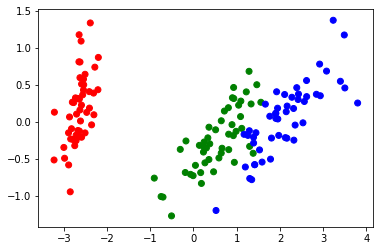

In [24]:
plt.scatter( pcaf[:,0], pcaf[:,1] , c= color )
plt.show()

In [32]:
pcadf = pd.DataFrame( pcaf)
pcadf.columns = ['x','y']
pcadf['target'] =iris.target
pcadf

,x,y,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


In [28]:
import seaborn as sb

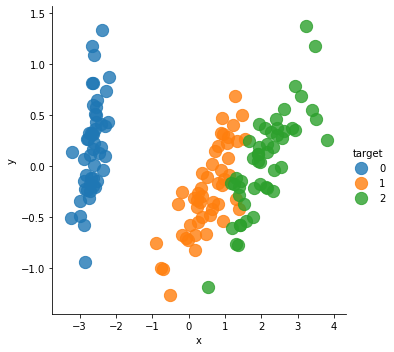

In [33]:
sb.lmplot(  x='x', y='y', data=pcadf , fit_reg=False, 
        hue='target', scatter_kws={"s": 150} )
plt.show()

In [35]:
model = PCA( n_components=1)
pca1f = model.fit_transform(irisDF )
pca1f.shape

(150, 1)

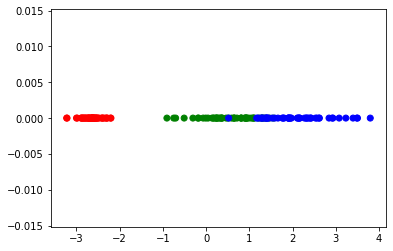

In [42]:
xf = pca1f[:,0]
yf = len(xf)*[0]
plt.scatter( xf, yf , c= color)
plt.show()

In [ ]:
# wine 데이터셋을 2차원으로 차원축소후 분류를 확인하시요..

In [47]:
wine = load_wine()

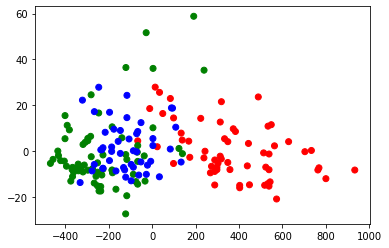

In [49]:
winecolor=[]
for n in wine.target:
    if n==0:
        winecolor.append('r')
    elif n==1:
        winecolor.append('g')
    else:
        winecolor.append('b')
        
wine = load_wine()
wineDF = pd.DataFrame( wine['data'], columns=wine['feature_names'] )

model = PCA(n_components=2) # 2차원으로 차원축소
pcaf = model.fit_transform( wineDF )

xf = pcaf[:,0]
yf = pcaf[:,1]
plt.scatter( xf, yf, c=winecolor )
plt.show()


In [53]:
pcaf

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

In [54]:
model.inverse_transform([[ 3.18562979e+02,  2.14921307e+01]] )

array([[1.35550621e+01, 2.16571712e+00, 2.52733485e+00, 1.85753157e+01,
        1.26911695e+02, 2.62930473e+00, 2.52743531e+00, 2.93532441e-01,
        1.88978551e+00, 6.12397031e+00, 9.95653303e-01, 2.76112769e+00,
        1.06501783e+03]])

In [56]:
model.transform( [wineDF.values[0]] )

array([[318.56297929,  21.49213073]])

In [68]:
[wineDF.values[0]]

NameError: name 'wineDF' is not defined